 ## $\underline{ \textbf{Data assimilation on a PAPA}}$
 
 
 
 **Statut** : In progress
 
**Purpose**: We propose here an assimilation problem whose goal is to infer the mass **m** and moment of inertia **$I_\alpha$** of a PAPA from observations made on displacemenst.
 
 
 **Reference** : 
 
 [1] : [ V. Mons, J.-C. Chassaing, T. Gomez, P. Sagaut, "Reconstruction of unsteady viscous flows using data assimilation schemes", JCP 316 (2016) p. 255-280.](https://dropsu.sorbonne-universite.fr/s/oP8s9CeNS5zW5DG)
 
 [2] : [ A. Chaarane, "Data Assimilation for Flow Induced Vibrations",Stage, InstitutJean Le Rond D’Alembert, 2021.](https://dropsu.sorbonne-universite.fr/s/kr97PiKoJ8jFHfw)
 
 
-----------------------------------
**A. Chaarane**, Institute  D'Alembert, (1 May 2022)

-----------------------------------

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import sys
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import copy
# ------ Importation Local
PATH_DATA = "../../DATA/DA_4DEnVar_V1/PAPA_FNN/Mass_Ialpha/"
PATH_CONF = "../../Inference_Problem/PAPA/"
sys.path.append(PATH_CONF)

sys.path.append("../")
from Post_Trait import POSTRAIT

PST = POSTRAIT(PATH_DATA)

### Configuration of the DA problem
We propose here an inference problem on the mass m and the moment of inertia I α of the structure. The observations were made on the aerodynamic forces, lift and momentum, every 0.03 step time  in the time interval [ 0., 1.5]. The reference and initialization control vectors are defined in the table below along with the observation and ensemble parameters.

In [6]:
PST.show_cfg()

-------------------------------------------------------------------------------------------------------------------
                                                Parametres                                         
--------------------------------------------------------------------------------------------------------------------
     Modele name      :                   PAPA                
     DA Method        :                   4DEnVar (V1)        
     Uncertains param :                                                       
                  name     : mass   I_alpha
                 reference : mass = 87.07   I_alpha = 3.73   
                 estimate  : mass = 65.0   I_alpha = 1.8   
                                                                         
     Nbr Iteration =  10  |  Nbr Ensemble =   40  | Param_sigma = 0.150000
                                                                         
     Observations     :                                                  

observables### Function Cost


$\newcommand{\Gama}{\boldsymbol{\gamma}} 
\newcommand{\B}{\boldsymbol{B}} 
\newcommand{\C}{\boldsymbol{C}} 
\newcommand{\Gamae}{\boldsymbol{\gamma}^{(e)}}
\newcommand{\YN}{( \boldsymbol{y}{_k})_{0\leq k\leq N}}
\newcommand{\XN}{( \boldsymbol{x}{_k})_{0\leq k\leq N}}
\newcommand{\Ep}{ \boldsymbol{E}'}
\newcommand{\Beta}{ \boldsymbol{\beta}}
\newcommand{\h}{ \boldsymbol{h}}
\newcommand{\x}{ \boldsymbol{x}}
\newcommand{\y}{ \boldsymbol{y}}$

The DA framework addressed in this study is to infer the control vector $\Gama$ assuming that observations $\boldsymbol{y}$  are given by
$\boldsymbol{y}=\boldsymbol{h}(\boldsymbol{x}) +\boldsymbol{\epsilon}^0 $, with $\h$  the observation operator and $\boldsymbol{\epsilon}^0$  the measurement error.
If the model is supposed to be exact,  the control vector is sought as a solution which minimises the following cost function

\begin{align}
J(\Gama) &= \; \frac{1}{2} \Vert \h\big(\x (\Gama)\big) - \y \Vert^2_{\C^{-1}} 
%\textbf{Grad}_{obs} &=\sum_{n=0}^{N} \boldsymbol{H}_k '^T \C^{-1}\boldsymbol{d}\\
%\textbf{Hess}_{obs}&=\sum_{n=0}^{N} \boldsymbol{H}_k '^T \C^{-1}\boldsymbol{H}_k '
\end{align}

where $\C$ denotes the covariance matrix of the measurement error and $ \Vert \cdot \Vert ^2_{\C^{-1}} = \cdot ^T \C ^{-1} \cdot$.

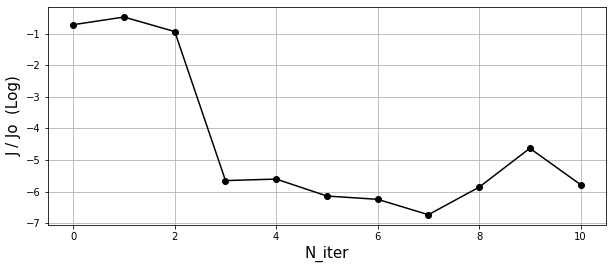

In [7]:
plt.figure(figsize=(10,4))
PST.plot_Jcost()

Here we plot the cost function $J$ as a function of the number of iterations, we plot the logarithm of ($J/J_0$) where $J_0$ is the cost caculated with the initialization vector.  We can see that the latter decreases with each iteration and starts to converge around the 3rd iteration. Here we have deactivated the breaking criterion to see the saturation of the cost function. 

### Control Vectors  

In [8]:
PST.show_param_ref_opti_est(True)

+----------------+--------+-----------+
|                |   mass |   I_alpha |
+================+========+===========+
| Reference      |  87.07 |      3.73 |
+----------------+--------+-----------+
| Initialisation |  65    |      1.8  |
+----------------+--------+-----------+
| Optimized      |  87.07 |      3.73 |
+----------------+--------+-----------+


The optimized vector presented here is the control vector obtained with the DA optimization in the last Iteration, we see that it is equal to the reference with an accuracy of about $10^{-2}$. This shows that our assimilation method is very efficient.

### Reconstruction of airfoil oscillations. 

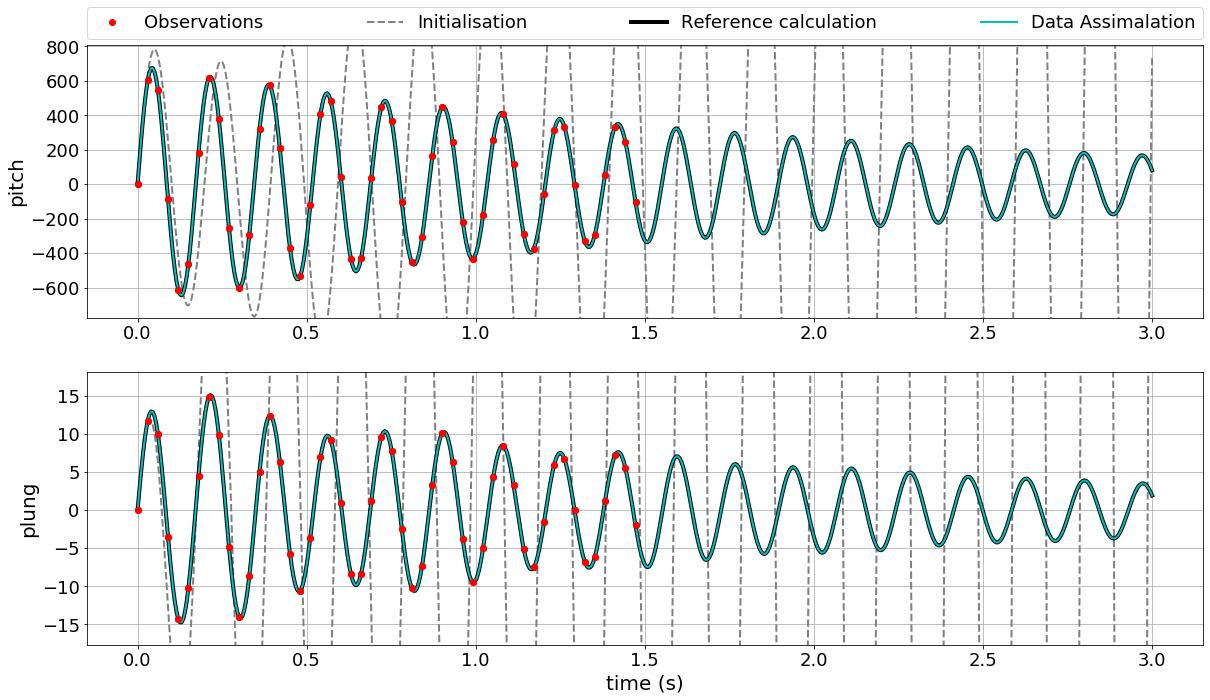

In [9]:
plt.figure(figsize=(20,300))
PST.plot_obs_ref_est_opt()

We have represented the reconstruction of the airfoil displacements as a function of time. We have in red the observations, in grey the initial calculation which is very far from the reference solution which is in cyan color. We can see that after the optimization process we manage to reconstruct perfectly the displacements of the profile by passing over the observations and which are almost equal to the reference state at long times. 

### Sample analysis during the optimisation process. 

In [10]:
df_samples = copy.copy(PST.get_samples_df())
df_samples["Solver"] = "PAPA"
df_samples.head(6)

,mass,I_alpha,DA_Iter,Sample,Solver
0,65.214814,1.499824,0,0,PAPA
1,60.859978,1.887968,0,1,PAPA
2,63.435434,2.256252,0,2,PAPA
3,63.371568,1.624444,0,3,PAPA
4,64.350114,1.720679,0,4,PAPA
5,64.337322,1.702912,0,5,PAPA


We display above a part of the samples, we have a total of $N_{ens} \times N_{iter}$ =$40\times3$  samples. For a better analysis, we can visualize them on the figure above.  

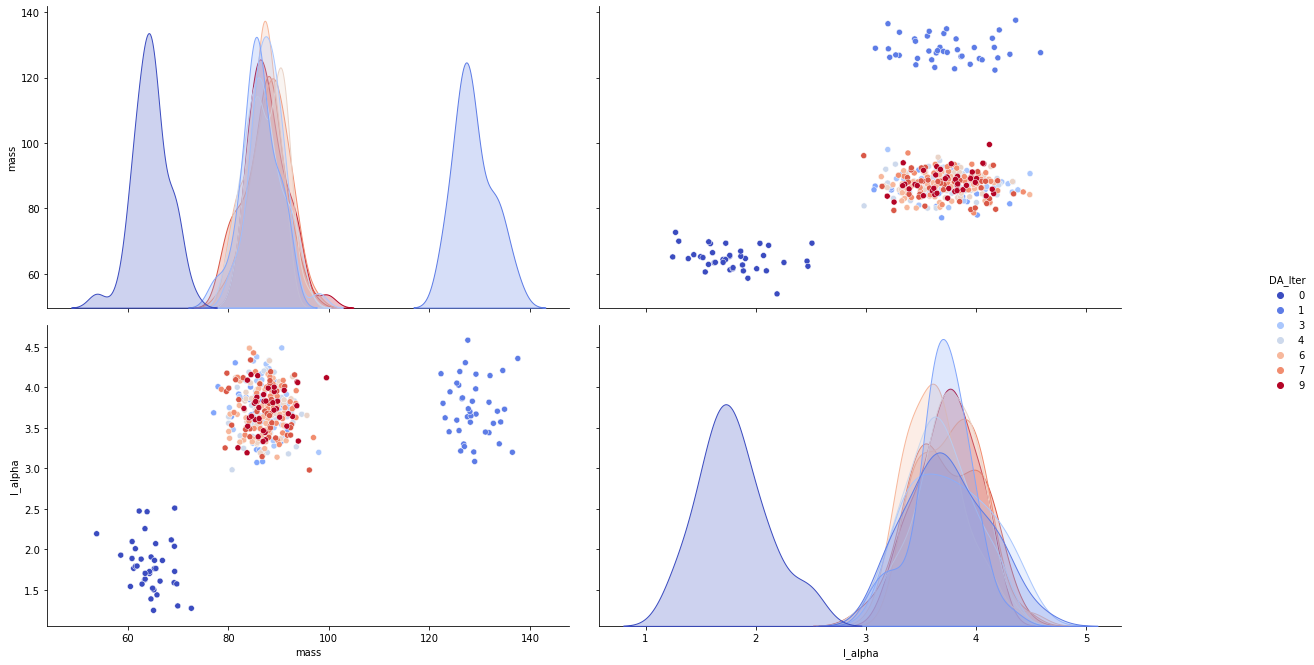

In [11]:
sns_plot =sns.pairplot(df_samples, vars = PST.CFG.Param_Name, hue ="DA_Iter", palette="coolwarm")#,markers=markers)
sns_plot.fig.set_size_inches(20,10)

Here we represent the samples obtained at each iteration, we can see that from one iteration to the next the samples group together to form a kind of cluster.

### Strategy for combining DA and FNN

The DA optimisation process is very computationally intensive, as it requires the execution of the HF (High Fidelity) model for all samples at each iteration. We aim to reduce this computational time by replacing the execution of the HF model with a deep learning  model. 

The strategy we will use in this example is as follows: The samples of the first iteration will be propagated with the HF model. Then for the following iterations, if a sample is in a cluster, it will be propagated with the FNN model.

In [ ]:
Path_FNN = "../../Src_Solver/FNN/"
sys.path.append(Path_FNN)
from  Pre_processing_data import PTD_param

In [ ]:
call_normalise  = 0
PST.scaler = StandardScaler()
def MyFOM(param) :
    global call_normalise
    # param = [m,I]
    
    # on recupere le numero du sample et de l'iteration
    # on parcours tout les samples et on s'arrete si mass = param[0] and mass = param[]
    n_iter_samp =df_samples.loc[(df_samples[PST.CFG.Param_Name[0]] == param[0]) & \
                        (df_samples[PST.CFG.Param_Name[1]] == param[1])][["DA_Iter", "Sample"]].values[0]
    
    n_iter = n_iter_samp[0]; n_sample = n_iter_samp[1]
    obsvervables = PST.get_observables_of_sample(n_iter,n_sample) 
    
    if np.isnan(obsvervables).any() :
        print("Warning !!!!!")
        print("NaN found in ")
        print(f"n_iter = {n_iter} and n_sample = {n_sample}")   
    return  obsvervables  



## import tensorflow

In [ ]:
## import tensorflow
# deactivate CUDA
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Flatten,Dense

prfx = "FNN/"
folder = "../../DATA/"

In [ ]:
n_time           = len(PST.time)
n_features       = PST.CFG.Param_Dim
input_shape      = (n_time,n_features+1)

### Define the Dataset
| | | |      
|-|-|-|
|  Control Vector      |  $\mu = [mass,I_{alpha}]$                |   $m \times  2$                    |  
|  Input Data          |  $X = [t, \mu]$                          |   $ m \times N_{time} \times (2+1)$|
|  Output Data         |  $Y = [C_L,C_M]$                         |   $m \times (2 *  N_{time}) $           |             

with $m$ the number of training data 

In [ ]:
def MyFNN(input_shape,n_out, N_layer=2, N_units = 30, learning_rate=1e-4):
    model              =  Sequential()
    initializer        =  tf.keras.initializers.GlorotUniform(seed=101)
    optimizer          =  tf.keras.optimizers.Adam(learning_rate=learning_rate) 
    bias_initializer   =  tf.keras.initializers.Zeros()
    kernel_regularizer =  tf.keras.regularizers.l2(l2=0)
    model.add(Dense(N_units, kernel_regularizer=kernel_regularizer,activation='tanh',bias_initializer=bias_initializer,kernel_initializer=initializer,input_shape=input_shape))
    
    for layer in range(N_layer-1) :
        model.add(Dense(N_units, kernel_regularizer=kernel_regularizer,activation='tanh',bias_initializer=bias_initializer,kernel_initializer=initializer))
    
    model.add(Flatten())
    model.add(Dense(n_out))
    
    model.compile(optimizer=optimizer, loss='mse')
    
    return model

model = MyFNN(input_shape,2*n_time)
model.summary()

2022-05-03 11:55:42.641734: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-03 11:55:42.641800: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: cael
2022-05-03 11:55:42.641815: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: cael
2022-05-03 11:55:42.641977: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.47.3
2022-05-03 11:55:42.642025: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 510.47.3
2022-05-03 11:55:42.642038: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 510.47.3
2022-05-03 11:55:42.642615: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performa

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 600, 30)           120       
                                                                 
 dense_1 (Dense)             (None, 600, 30)           930       
                                                                 
 flatten (Flatten)           (None, 18000)             0         
                                                                 
 dense_2 (Dense)             (None, 1200)              21601200  
                                                                 
Total params: 21,602,250
Trainable params: 21,602,250
Non-trainable params: 0
_________________________________________________________________


### Iteration 0
### Iteration 1
### Iteration 2




In [ ]:
df_samples2 =  df_samples.loc[ (df_samples["DA_Iter"] ==2) |  (df_samples["DA_Iter"] ==3)]
df_samples2_bar  = copy.copy(df_samples2)
for i,parm_nm in enumerate(PST.CFG.Param_Name): 
    df_samples2_bar[parm_nm] =( 2*df_samples2[parm_nm] - PST.CFG.Param_Bounds[i][0] -PST.CFG.Param_Bounds[i][1])\
                    / (PST.CFG.Param_Bounds[i][1]-PST.CFG.Param_Bounds[i][0])


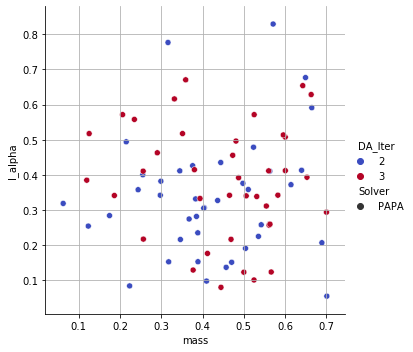

In [ ]:
sns.relplot(data=df_samples2_bar, x=PST.CFG.Param_Name[0], y=PST.CFG.Param_Name[1],hue ="DA_Iter",palette="coolwarm", style="Solver" )
plt.grid()
plt.show()

In [ ]:
rayon_culster    = 0.03
N_cluster_sample = 1


Param_old_bar    = df_samples2_bar.loc[(df_samples["DA_Iter"] ==2)][PST.CFG.Param_Name].values
Param_new_bar    = df_samples2_bar.loc[(df_samples["DA_Iter"] ==3)][PST.CFG.Param_Name].values

def Get_FNN_Samples(Param_old_bar, Param_new_bar, N_cluster_sample, rayon_culster):
    
    HF_param_bar = []; FNN_param_bar =[]
    for prm_new in Param_new_bar :
        n_cluster = 0
        for prm_old in Param_old_bar :
            rayon  = np.sqrt( (prm_new[0]-prm_old[0])**2 + (prm_new[1]-prm_old[1])**2 )
            if rayon <= rayon_culster :
                n_cluster +=1 
        if n_cluster >= N_cluster_sample :
            if len(FNN_param_bar)<1 :
                FNN_param_bar = np.array([prm_new])  
            else :
                FNN_param_bar = np.vstack([FNN_param_bar,prm_new])
        else :
            if len(HF_param_bar)<1 :
                HF_param_bar = np.array([prm_new])  
            else :
                HF_param_bar = np.vstack([HF_param_bar,prm_new])
    
    return HF_param_bar, FNN_param_bar
            
            
                    
                
HF_param_bar, FNN_param_bar =Get_FNN_Samples(Param_old_bar, Param_new_bar, N_cluster_sample, rayon_culster)   


In [ ]:
for prm in FNN_param_bar :
    index = df_samples2_bar.loc[ (df_samples2_bar[PST.CFG.Param_Name[0]] ==prm[0]) &  \
                         (df_samples2_bar[PST.CFG.Param_Name[1]] ==prm[1])    ].index 
    df_samples2.iloc[index[0]-80,-1]  = "FNN"


/home/avicene/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


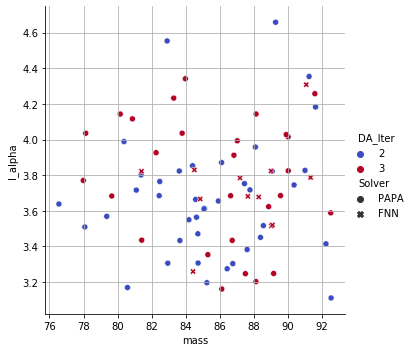

In [ ]:
sns.relplot(data=df_samples2, x=PST.CFG.Param_Name[0], y=PST.CFG.Param_Name[1],hue ="DA_Iter",palette="coolwarm", style="Solver" )
plt.grid()
plt.show()


## Training 

In [ ]:
df_samples_train = df_samples2.loc[ (df_samples2["Solver"] =="PAPA")]
df_samples_test  = df_samples2.loc[ (df_samples2["Solver"] =="FNN")]


In [ ]:
model       = MyFNN(input_shape,2*n_time,N_layer=3, N_units = 40, learning_rate=1e-3)
Param_train = df_samples_train[PST.CFG.Param_Name].values
Param_test  = df_samples_test[PST.CFG.Param_Name].values
PTD         = PTD_param(model, PST.time,MyFOM, Param_train, Param_test, Param_vald=np.array([]),
                                 folder = folder, prfx=prfx)

PTD.Get_Dataset()



---- Data Training -------:
        mu shape          :  (67, 2)
        X_train  shape    :  (67, 600, 3)
        Y_train  shape    :  (67, 1200)


---- Data Test -----------:
        mu shape          :  (13, 2)
        X_test  shape     :  (13, 600, 3)
        Y_test  shape     :  (13, 1200)



time  shape    :  (600,)



In [ ]:
PTD.Myfit(epochs = 200, batch_size=512, verbose = 0, validation=False, overwrite=True)


2022-05-03 11:56:08.065047: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ../../DATA/FNN/assets


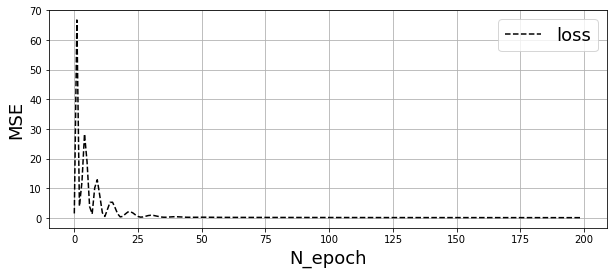

In [ ]:
PTD.plot_loss(key=['loss'],figsize=(10,4))

#### Prediction    


In [ ]:
PTD.Mypredict(overwrite=True)

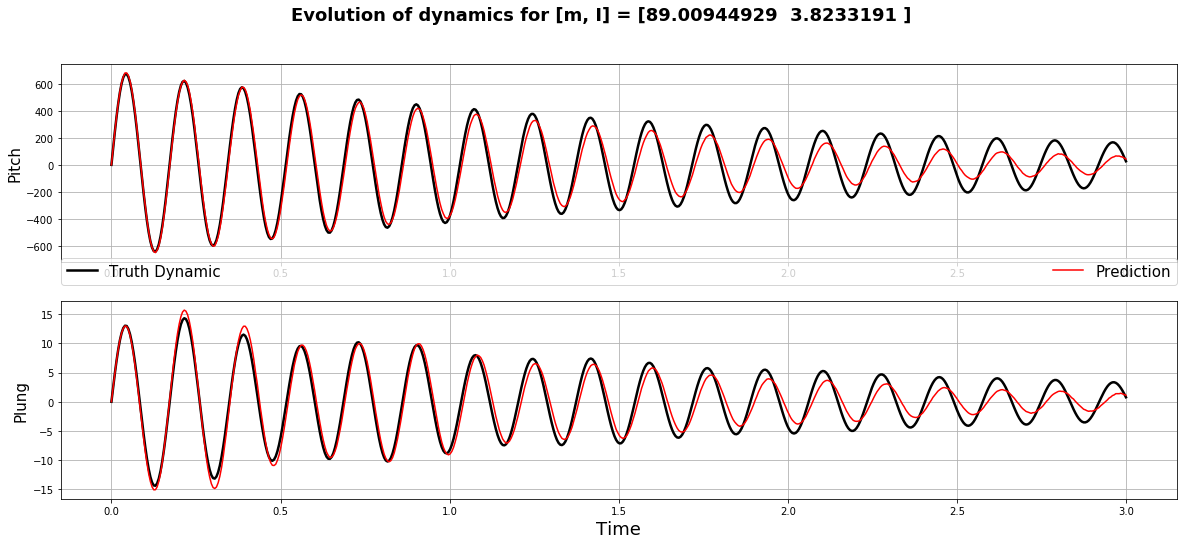

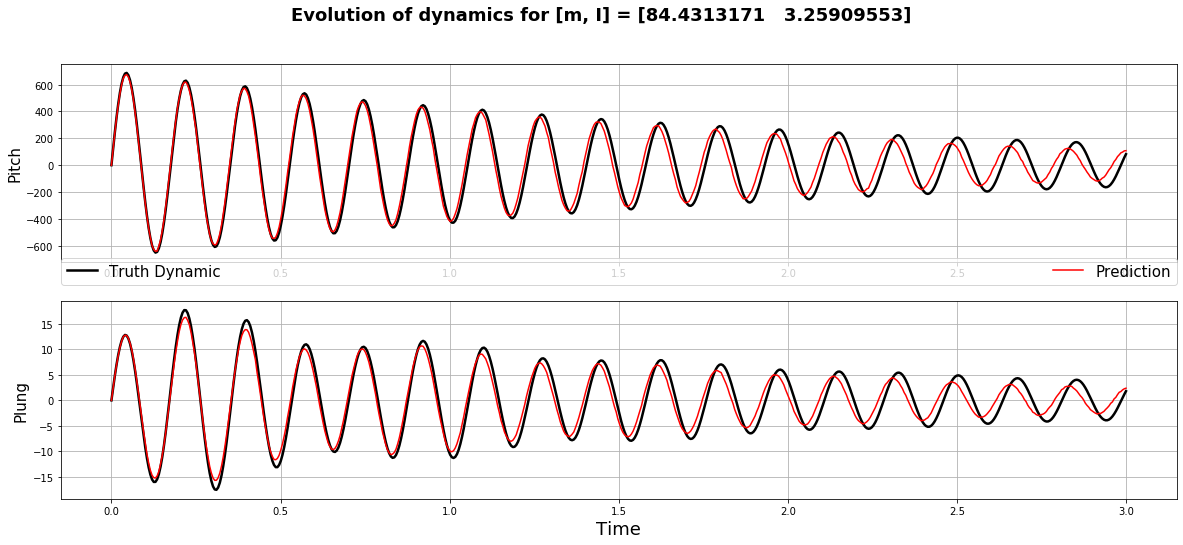

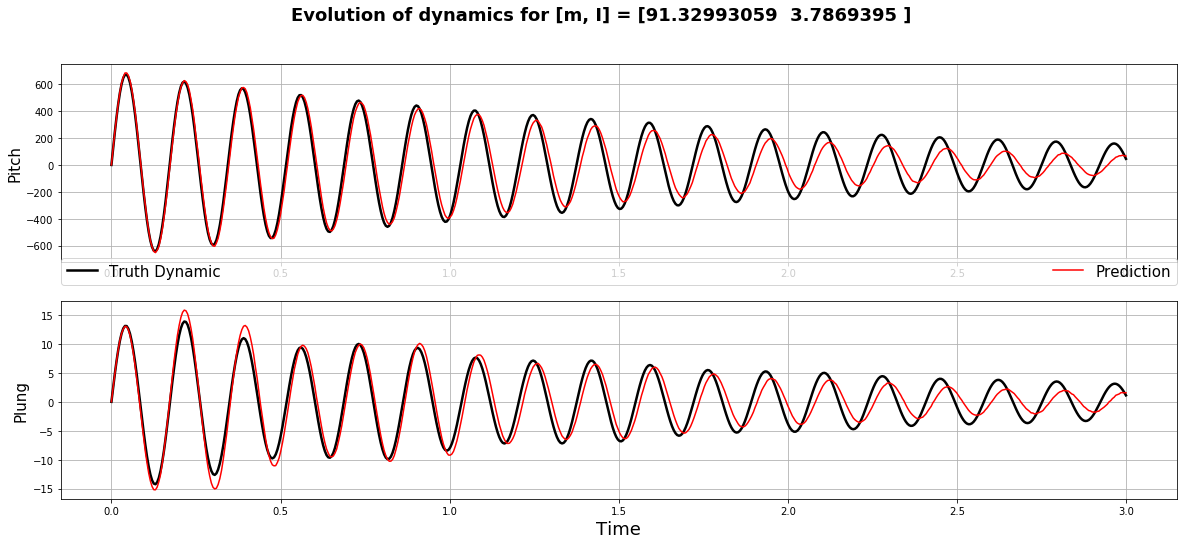

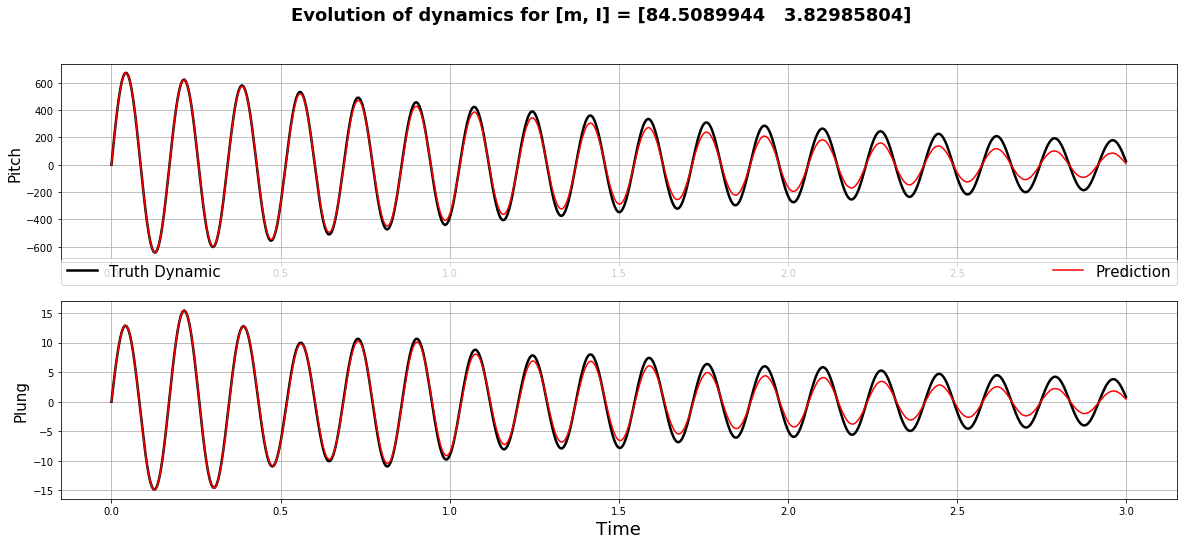

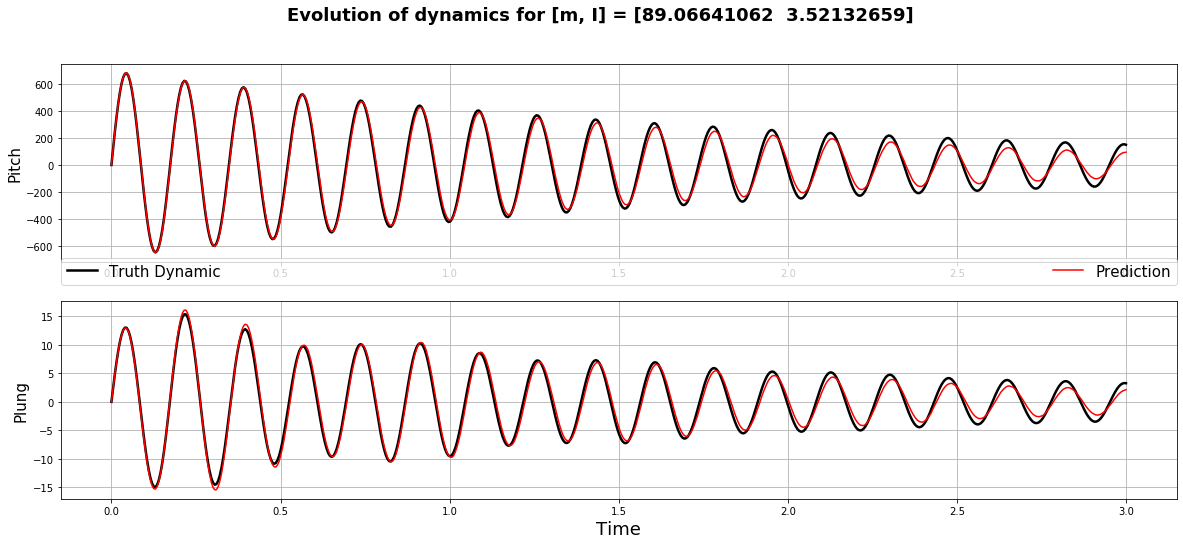

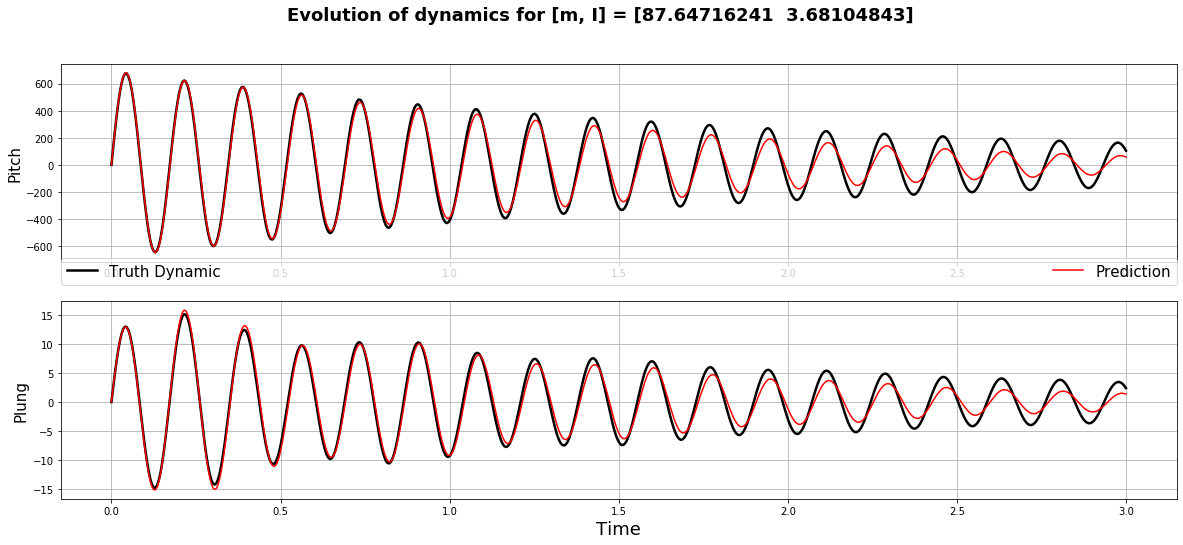

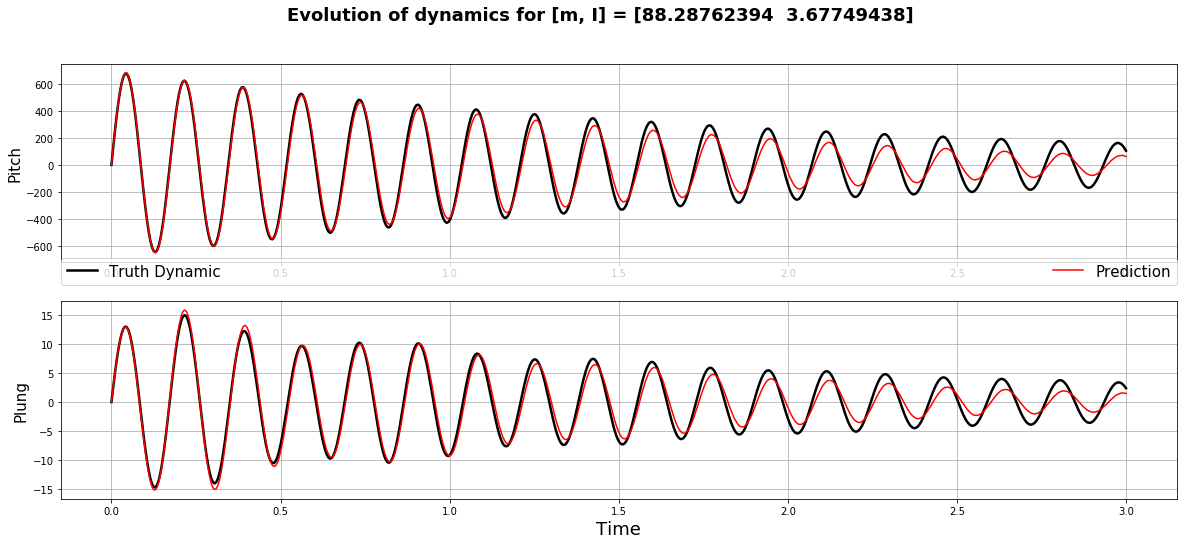

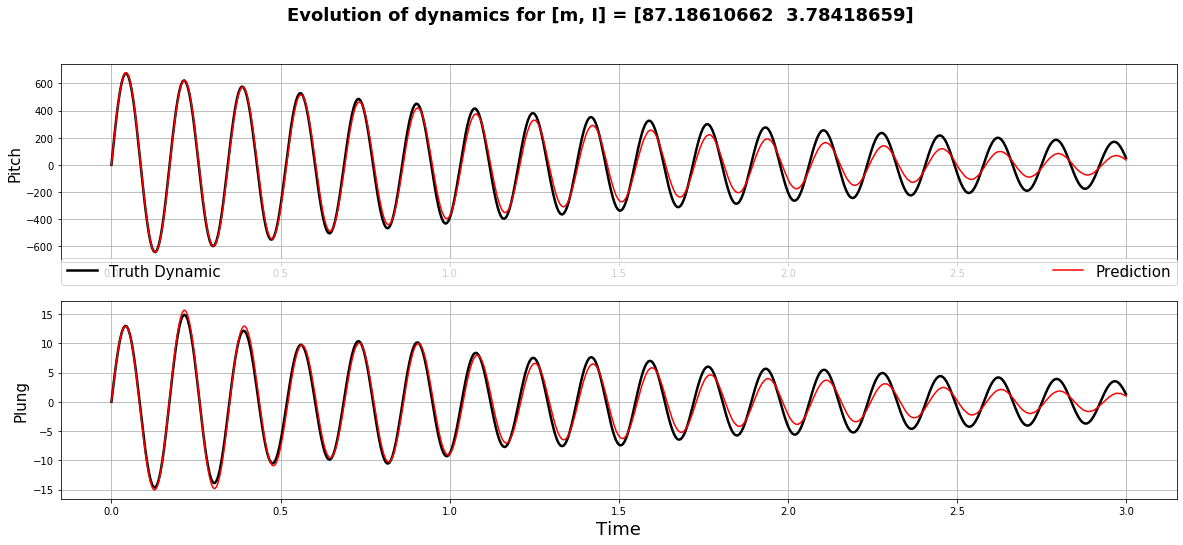

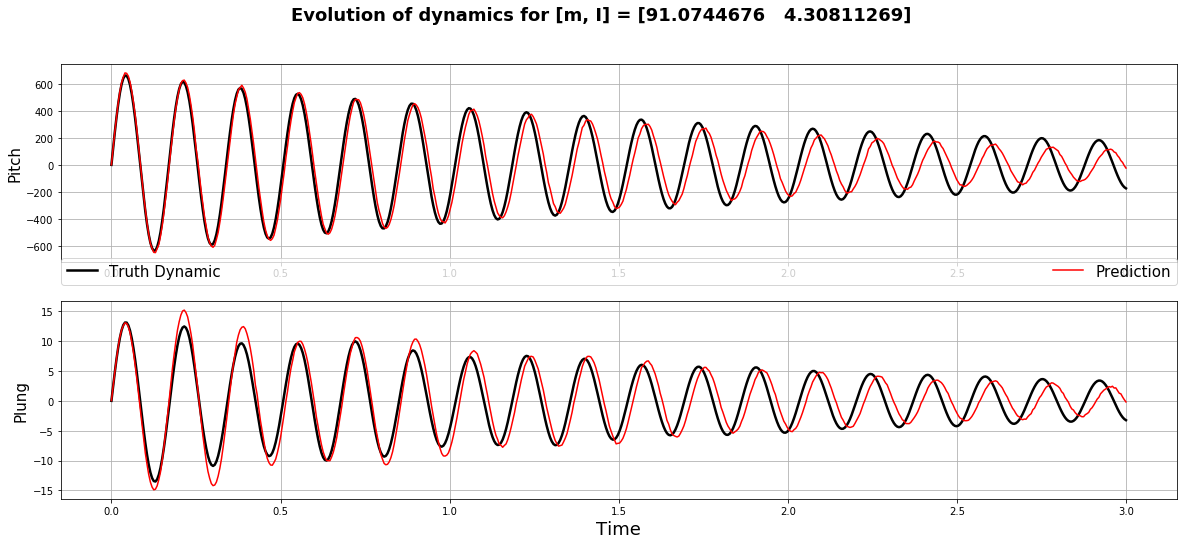

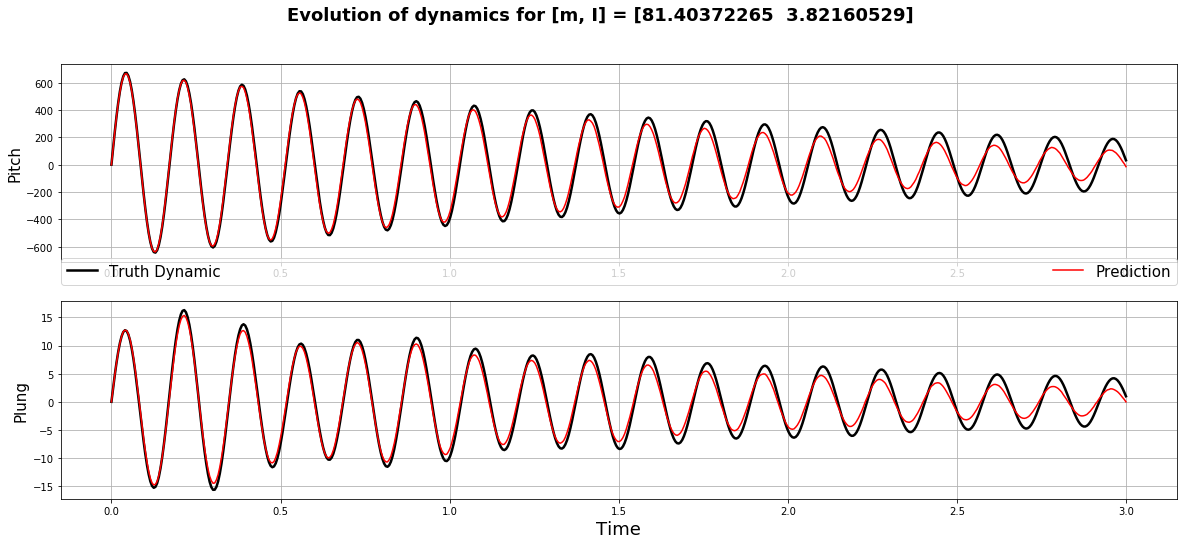

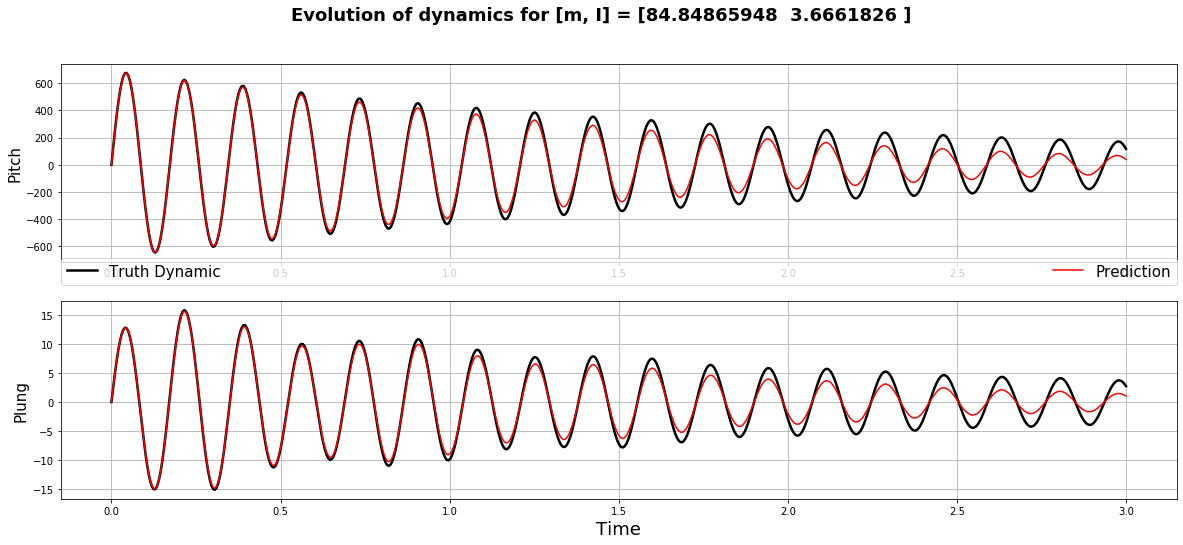

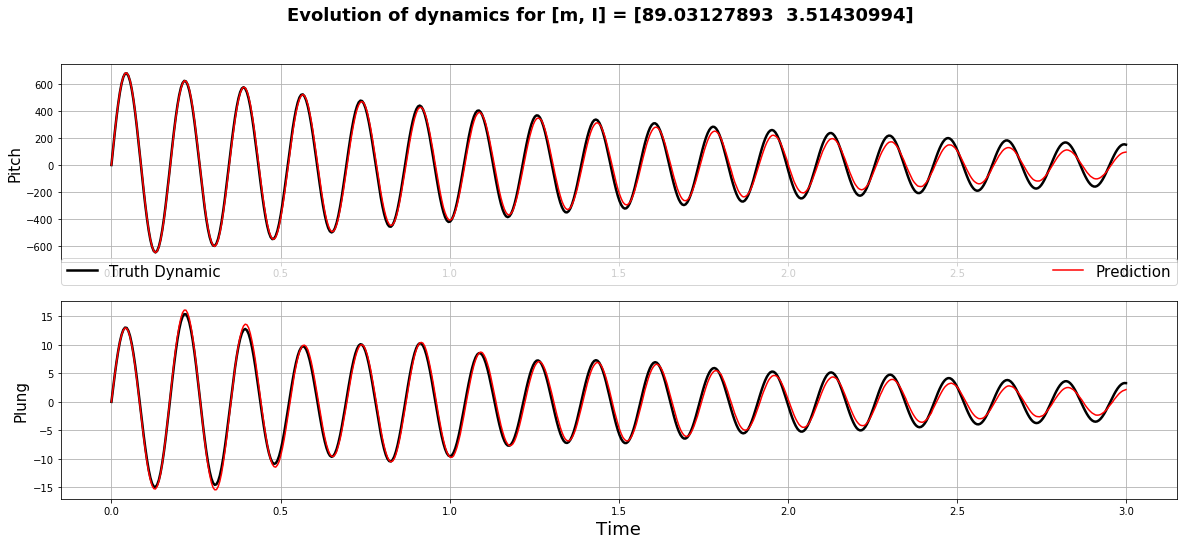

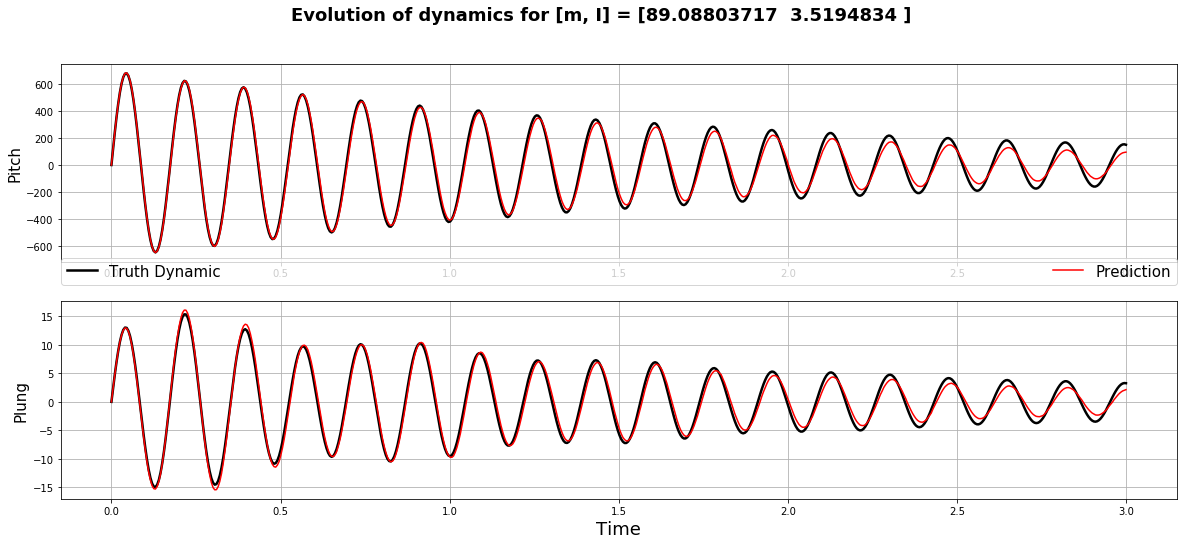

In [29]:
PTD.plot_truth_predi(figsize=(20,8),name_mu = "[m, I]", ylabel = "Pitch", ylabel2= "Plung")


In [ ]:
PTD.name="FNN"
PTD.all_info()
print("")


FNN
info :
   -  Training    time (s)    : 23.78993325214833 s
   -  Prediction  time (s)    : 1.493025915697217 s
   - Prediction error  MSE    :  [2563.802795926522, 3068.9009130488275, 3934.7506238778465, 992.8762639237261, 674.5822039843265, 1476.7610604427778, 1622.9794479642335, 1640.8745681679777, 6421.844975416821, 1197.1870716328847, 1291.4770908562198, 618.1557578308596, 663.5377043635596]

